In [ ]:
#Datasets : It’s a class that provides access to data samples and labels
#DataLoader:  It hands you batches and can shuffle or sample the data

In [5]:
#The MNIST dataset is a popular dataset of handwritten digits (0-9) 
#used for training and testing machine learning models


In [10]:
from torchvision import datasets , transforms

transform=transforms.ToTensor()
train_dataset = datasets.MNIST(
    root="data",          # where to store the data
    train=True,           # True = training set, False = test set
    download=True,        # download if not already in root
    transform=transform,       # preprocessing/augmentation
    target_transform=None # optional transform for labels
)
#error in img.shape without transform 

In [9]:
img,label=train_dataset[0]
print(type(img),img.shape)
print(label)

<class 'torch.Tensor'> torch.Size([1, 28, 28])
5


In [12]:
from torch.utils.data import DataLoader



# Wrap dataset in a DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=64,   # how many samples per batch
    shuffle=True     # shuffle dataset each epoch
)


In [13]:
# Iterate over the DataLoader
for images, labels in train_loader:
    print(type(images), images.shape)  # shape of image batch
    print(type(labels), labels.shape)  # shape of label batch
    break  # just check the first batch


<class 'torch.Tensor'> torch.Size([64, 1, 28, 28])
<class 'torch.Tensor'> torch.Size([64])


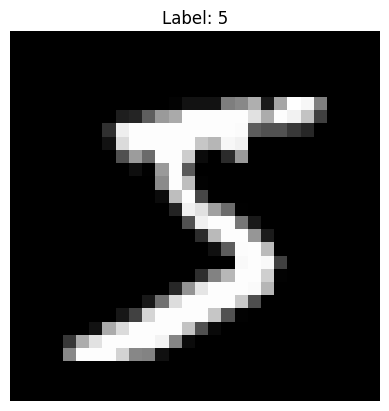

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")#squeeze() to display the image
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

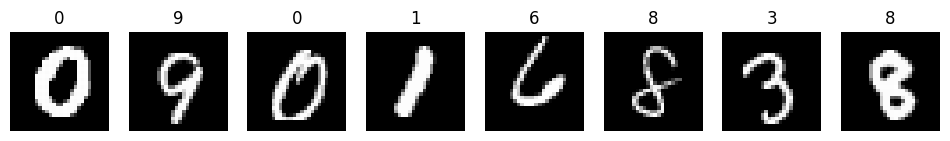

In [18]:
from torch.utils.data import DataLoader

# Create DataLoader
train_loader_1 = DataLoader(train_dataset, batch_size=8, shuffle=True)


# Get one batch
images, labels = next(iter(train_loader_1))
# iter(train_loader) creates an iterator over batches.

# next(...) gives the first batch

# Plot batch
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap="gray")
    axes[i].set_title(str(labels[i].item()))
    axes[i].axis("off")
plt.show()


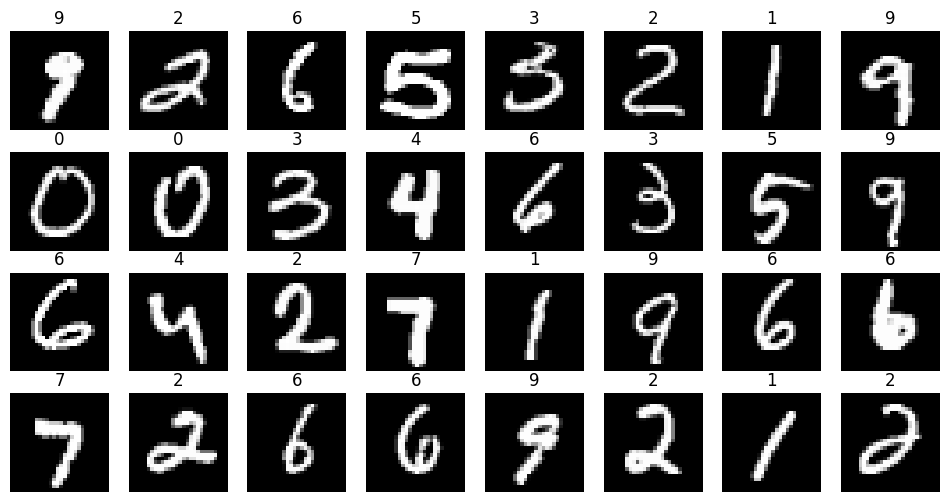

In [19]:
import matplotlib.pyplot as plt

def show_batch(images, labels, rows=4, cols=8):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    for i in range(rows * cols):
        ax = axes[i // cols, i % cols]
        ax.imshow(images[i].squeeze(), cmap="gray")
        ax.set_title(str(labels[i].item()))
        ax.axis("off")
    plt.show()

# Get one batch (e.g., 32 images)
images, labels = next(iter(DataLoader(train_dataset, batch_size=32, shuffle=True)))

# Show them
show_batch(images, labels, rows=4, cols=8)


In [ ]:
# Normalization rescales pixel values (originally 0–1) to about [-1, 1].
#This helps models train faster and improves convergence.

transform_norm = transforms.Compose([
    transforms.RandomHorizontalFlip(), 
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))   # mean=0.5, std=0.5
])
mnist_norm = datasets.MNIST(root="data", train=True, download=True, transform=transform_norm)
